Saving Iris.csv to Iris.csv
Accuracy: 96.67%


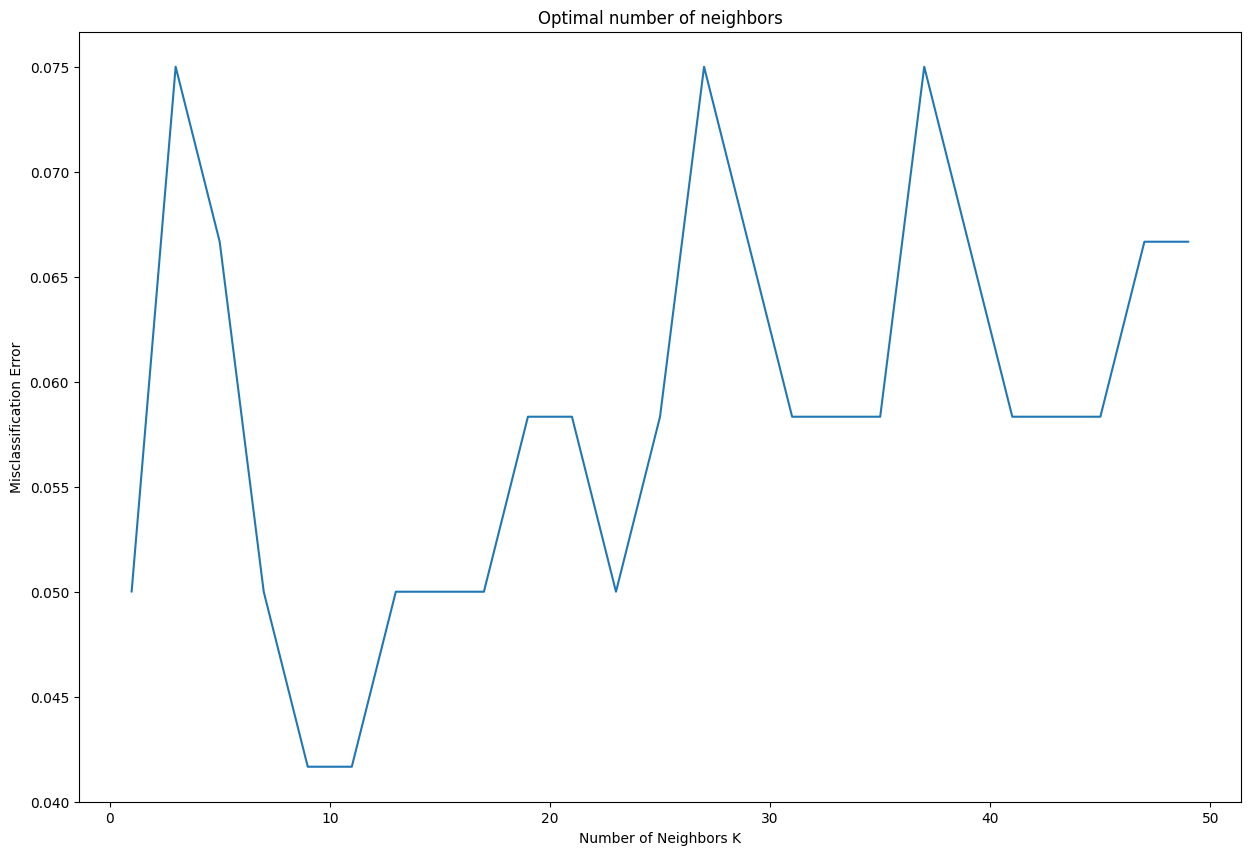

Custom KNN Accuracy: 96.67%


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas.plotting import parallel_coordinates, andrews_curves
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io

# Upload file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded file name dynamically
dataset = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Data preprocessing
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = dataset[feature_columns].values
y = LabelEncoder().fit_transform(dataset['Species'].values)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# KNN classification
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Cross-validation for parameter tuning
k_list = list(range(1, 50, 2))
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=10, scoring='accuracy').mean() for k in k_list]
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('Optimal number of neighbors')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Custom KNN Implementation
class MyKNeighborsClassifier():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes_ = np.unique(y)

    def predict(self, X_test):
        return np.array([self._single_prediction(x) for x in X_test])

    def _single_prediction(self, x):
        distances = np.sum((self.X - x) ** 2, axis=1)
        nearest_indices = np.argsort(distances)[:self.n_neighbors]
        nearest_labels = self.y[nearest_indices]
        return np.bincount(nearest_labels).argmax()

# Instantiate and evaluate custom classifier
my_classifier = MyKNeighborsClassifier(n_neighbors=3)
my_classifier.fit(X_train, y_train)
my_y_pred = my_classifier.predict(X_test)
accuracy = accuracy_score(y_test, my_y_pred) * 100
print(f'Custom KNN Accuracy: {accuracy:.2f}%')